<a href="https://colab.research.google.com/github/TonmoyTalukder/deep-learning-explore/blob/main/PyTorch_Explore/5_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   [Convolutional Neural Networks (CNNs) deeplizard](https://youtu.be/YRhxdVk_sIs)
*   [Convolutional Neural Networks Standford](https://youtu.be/bNb2fEVKeEo)
*   [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/)
*   [How Do Convolutional Layers Work in Deep Learning Neural Networks?](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)





Files already downloaded and verified
Files already downloaded and verified


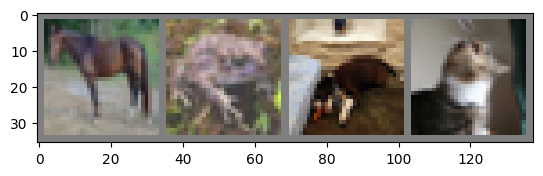

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [28]:
# test size

conv1 = nn.Conv2d(3, 6, 3)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 3)
print(images.shape)

x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)

x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 30, 30])
torch.Size([4, 6, 15, 15])
torch.Size([4, 16, 13, 13])
torch.Size([4, 16, 6, 6])


In [29]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # input_size(Number of color channel), output_size, kerne_size
        self.pool = nn.MaxPool2d(2, 2) # kernel_size, stride
        self.conv2 = nn.Conv2d(6, 16, 5) # last_output, output, kernel

        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # n_classes = 10

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 1st pooling and conv layer
        x = self.pool(F.relu(self.conv2(x))) # 2nd pooling and conv layer

        x = x.view(-1, 16*5*5) # flatten

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # no activation function at the last
        # no softmax, cause it is included in  nn.CrossEntropyLoss()
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [30]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/4], Step [2000/12500], Loss: 2.3067
Epoch [1/4], Step [4000/12500], Loss: 2.3170
Epoch [1/4], Step [6000/12500], Loss: 2.3081
Epoch [1/4], Step [8000/12500], Loss: 2.1146
Epoch [1/4], Step [10000/12500], Loss: 2.2877
Epoch [1/4], Step [12000/12500], Loss: 2.0356
Epoch [2/4], Step [2000/12500], Loss: 2.0703
Epoch [2/4], Step [4000/12500], Loss: 2.3025
Epoch [2/4], Step [6000/12500], Loss: 1.8280
Epoch [2/4], Step [8000/12500], Loss: 1.7973
Epoch [2/4], Step [10000/12500], Loss: 2.9888
Epoch [2/4], Step [12000/12500], Loss: 1.7823
Epoch [3/4], Step [2000/12500], Loss: 1.4148
Epoch [3/4], Step [4000/12500], Loss: 1.5120
Epoch [3/4], Step [6000/12500], Loss: 1.4948
Epoch [3/4], Step [8000/12500], Loss: 1.5284
Epoch [3/4], Step [10000/12500], Loss: 2.1778
Epoch [3/4], Step [12000/12500], Loss: 0.9194
Epoch [4/4], Step [2000/12500], Loss: 1.9137
Epoch [4/4], Step [4000/12500], Loss: 1.8652
Epoch [4/4], Step [6000/12500], Loss: 1.6108
Epoch [4/4], Step [8000/12500], Loss: 0.9652
Epoc

In [31]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 43.65 %
Accuracy of plane: 55.0 %
Accuracy of car: 51.6 %
Accuracy of bird: 31.6 %
Accuracy of cat: 10.9 %
Accuracy of deer: 34.0 %
Accuracy of dog: 42.9 %
Accuracy of frog: 50.8 %
Accuracy of horse: 59.6 %
Accuracy of ship: 59.4 %
Accuracy of truck: 40.7 %
